## Principal Component Analysis (PCA)

PCA applies an orthogonal (linear) transformation to a set of possibly correlated variables in order to produce a set of uncorrelated variables called principal components (PCs). These principal components are ordered such that the first component captures the largest possible amount of the variance present in the data, the second captures the next largest amount and so forth. The principal components turn out to correspond to the eigenvectors of the data covariance matrix. 

As a simple example, we fit scikit-learn's `PCA` class to the well-known Iris dataset.  This data set consists of 150 observations.  Each observation consists of four length measurements of parts of an iris flower.  The observations are each associated with a class, the species of the iris flower that was measured.  There are 50 observations per class.

In [5]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

from matplotlib import pylab as plt
import seaborn as sns
from ipywidgets import interact
from sklearn.decomposition import PCA
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR
from torch.utils.data import DataLoader, Subset
from torch.distributions import Normal
from torch.distributions.multivariate_normal import MultivariateNormal
from tqdm import trange
from math import pi
from IPython.display import Image
from types import MethodType

In [6]:
# Load iris dataset
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_labels = iris_data.target
iris_data = iris_data.data
# Center data
iris_data = iris_data - np.mean(iris_data, axis=0)
classes = set(iris_labels)

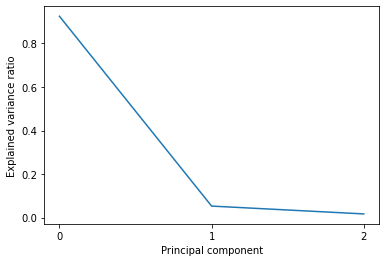

In [7]:
# Find the PCs
pcaIris3 = PCA(n_components=3)
pcaIris3.fit(iris_data)

# Variance captured by each principal component
plt.plot(pcaIris3.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.xticks([0,1,2])
plt.show()

Let $U$ be the orthogonal PC projection matrix that transforms the (centered) observation $\mathbf{x}\in\mathbb{R}^D$ on to the PC axes. By discarding the last columns of $U$ which correspond to PCs that capture little of the data variance, we can *encode* our data by representing it in a lower-dimensional space. Suppose we only retain the first $\nu$ columns of $U$, denoted by $U_\nu$, then we have

$$
\mathbf{z} = U_\nu^T\mathbf{x}
$$

where $\mathbf{z}\in\mathbb{R}^\nu$. The observation $\mathbf{x}$ can be (approximately) reconstructed from this lower-dimensional encoding by applying the following pseudo-inverse transformation (where $U_\nu U^T_\nu$ is diagonal, with first $\nu$ elements equal to one and the rest equal to zero):

$$
\hat{\mathbf{x}} = U_\nu\mathbf{z}
$$

Thus we can *encode* and *decode* between an input and feature space using linear transformations. 